In [1]:
#  Импортируем библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###  Кластерный анализ

In [2]:
df = pd.read_csv(u'Леденцы.dat', sep = ";")

In [3]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,4,5,5,5,3,3,3,3,3,3,3
1,5,4,5,5,3,3,3,3,3,3,3
2,5,5,4,5,3,3,3,3,3,3,3
3,5,4,5,5,3,3,3,3,3,3,3
4,4,5,5,5,3,3,3,3,3,3,3


In [4]:
df.shape

(338, 11)

Так как, объём данных небольшой, можем воспользоваться **иерархической кластеризацией** и отобразить процесс кластеризации на дендрограме.  
Стоит отдельно отметить, что стандартизация данных не требуется, так как, данные имеют одинаковую размерность.

### Иерархическая кластеризация

In [5]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

link = linkage(df, method='ward', metric='euclidean')

In [6]:
link[:5]

array([[  0.,   4.,   0.,   2.],
       [  1.,   3.,   0.,   2.],
       [  2.,   6.,   0.,   2.],
       [  5., 339.,   0.,   3.],
       [ 32., 338.,   0.,   3.]])

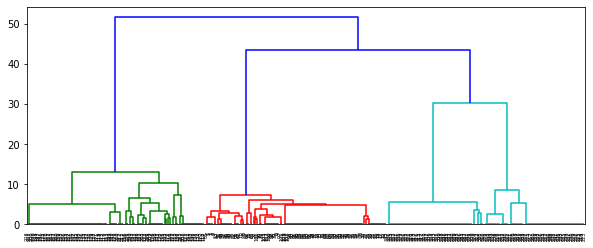

In [7]:
plt.subplots(figsize = (10, 4))
dn = dendrogram(link, orientation='top')

Хоть алгритм и пытается автоматически выделить количество классов(кластеров), мы вполне можем усомниться в правильности его ответа. Судя по строению дендрограмы, можно предположить, что на самом деле мы имеем дело с четырмя классами, а не с тремя.  
Воспользуемся графиком каменной осыпи, для того, чтобы удостовериться в правдивости нашей гипотезы.

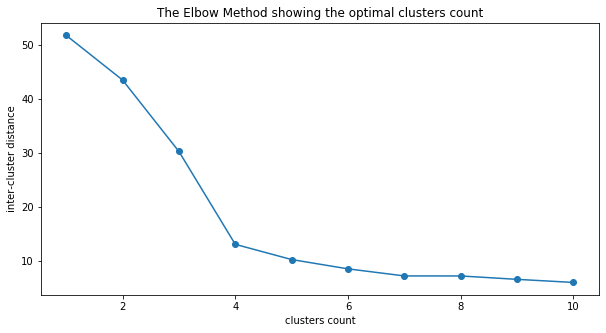

In [21]:
dist_rev = link[:, 2][::-1]
idxs = range(1, len(dist_rev)+1)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(idxs[:10], dist_rev[:10], marker='o')
ax.set_xlabel('clusters count')
ax.set_ylabel('inter-cluster distance')
ax.set_title('The Elbow Method showing the optimal clusters count')
plt.show()

На графике отображены не все этапы кластеризации, для наглядности решения нашей проблемыж. Как можно заметить, излом происходит при наличии четырёх кластеров.

In [9]:
df['h_cluster'] = fcluster(link, 20, criterion= 'distance')

Попробуем охарактеризовать типичное наблюдение для каждого класса.

In [10]:
ordinary_user = df.groupby('h_cluster').mean()
ordinary_user

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
h_cluster,,,,,,,,,,,
1,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
2,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
3,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
4,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


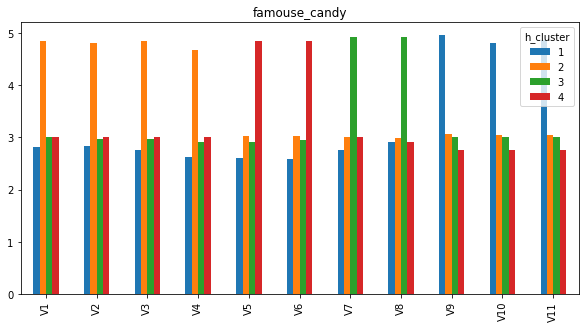

In [11]:
ordinary_user.T.plot(kind='bar', title='famouse_candy',figsize = (10, 5))

### Отчёт:  
1. На данной диаграмме отчётливо видно, что  
    * Люди относящиеся к первому классу, как правило уотребляют леденцы в большей степени для:
        - *для того, чтобы облегчить боль в горле*
        - *для того, чтобы избавиться от заложенности носа*
        - *для улучшения самочувствия*   
    * Люди относящиеся ко второму классу, как правило уотребляют леденцы в большей степени для того, чтобы:
        - *освежить дыхание*
        - *чувствовать себя увереннее*
        - *освежить полость рта*
        - *избавиться от неприятного вкуса во рту*   
    * Люди относящиеся к третьему классу, как правило уотребляют леденцы в большей степени как:
        - *заменитель других кондитерских изделий*
        - *когда им хочется чего-нибудь сладкого*
    * Люди относящиеся ко второму классу, как правило уотребляют леденцы в большей степени для того, чтобы:
        - *сконцентрироваться*
        - *отвлечься на несколько минут и подумать*  

Исходя из этого, можно предположить, что в первой группе люди считают, что леденец несёт какое то медикоментозное воздействие. Люди из второй группы считают, что леденцы помогают освежить дыхание и избавиться от неприятных запахов. Люди из третьей группы, просто сладкоежки, и наконец, люди из четвёртой группы употребляют леденцы, чтобы поспособствовать мозговой деятельности.

### Кластеризация методом k-means (k - срединх)

In [12]:
from sklearn.cluster import KMeans

In [13]:
df = pd.read_csv(u'Леденцы.dat', sep = ";")

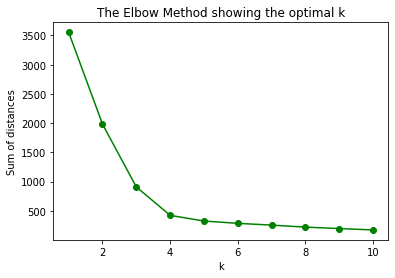

In [20]:
K = range(1, 11)
models = [KMeans(n_clusters=k, random_state = 42).fit(df) for k in K]
dist = [model.inertia_ for model in models]

# посмотрим на график каменной осыпи
# Plot the elbow
plt.plot(K, dist, marker='o', color = 'green')
plt.xlabel ( "k" )
plt.ylabel ('Sum of distances')
plt.title('The Elbow Method showing the optimal k')
plt.show()

На этот раз график "каменной осыпи" по оси ординат отражает общую сумму растояний от каждого объекта, до ближайшено кластер. И в Этом случае опять можо остановиться на 4-х кластерах.

In [17]:
model = KMeans(n_clusters=4, random_state=42)
model.fit(df)
df['k_cluster'] = model.labels_
ordinary_user = df.groupby('k_cluster').mean()
ordinary_user

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
k_cluster,,,,,,,,,,,
0,2.824074,2.833333,2.768519,2.620370,2.611111,2.583333,2.750000,2.916667,4.953704,4.814815,4.861111
1,4.845455,4.800000,4.836364,4.681818,3.036364,3.036364,3.000000,2.990909,3.072727,3.045455,3.045455
2,3.000000,2.966102,2.966102,2.915254,2.915254,2.949153,4.915254,4.915254,3.000000,3.000000,3.000000
3,3.000000,3.000000,3.000000,3.000000,4.852459,4.852459,3.000000,2.918033,2.754098,2.754098,2.754098


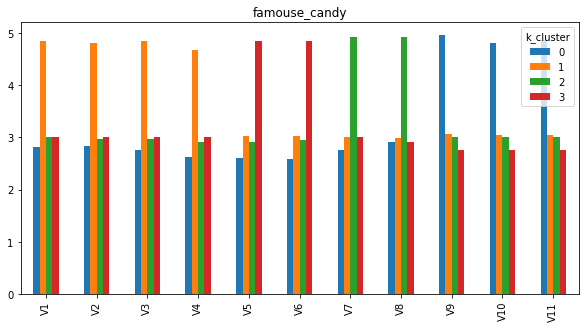

In [18]:
ordinary_user.T.plot(kind='bar', title='famouse_candy',figsize = (10, 5))

Итог: мы видим абсолютно такую же картину, что и при использовании иерархической кластеризации. Этот факт только подкрепляет нашу гипотезу.